In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

In [3]:
dat_0 = np.genfromtxt('pos_log_file_test_0.csv', delimiter=',', skip_header=False)
dat_1 = np.genfromtxt('pos_log_file_test_1.csv', delimiter=',', skip_header=False)

nodes_top = np.genfromtxt(r'C:\users\gebruiker\documents\offlinehextrack\lib\resources\node_pos_top.csv', delimiter=',', skip_header=True)
nodes_bot = np.genfromtxt(r'C:\users\gebruiker\documents\offlinehextrack\lib\resources\node_pos_bottom.csv', delimiter=',', skip_header=True)
ghost_nodes_top = np.genfromtxt(r'C:\users\gebruiker\documents\offlinehextrack\lib\resources\ghost_node_top.csv', delimiter=',', skip_header=True)
ghost_nodes_bot = np.genfromtxt(r'C:\users\gebruiker\documents\offlinehextrack\lib\resources\ghost_node_bottom.csv', delimiter=',', skip_header=True)

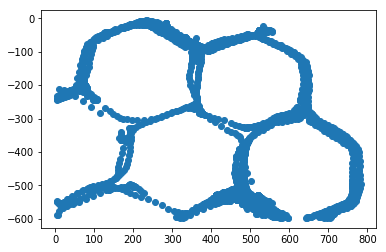

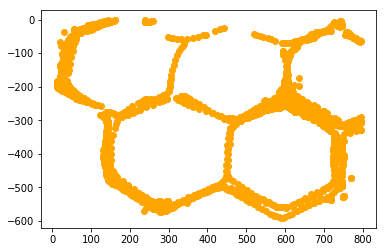

In [3]:
plt.plot(dat_0[:,0],-dat_0[:,1], 'o')
plt.show()
plt.plot(dat_1[:,0],-dat_1[:,1], 'o', color='orange')

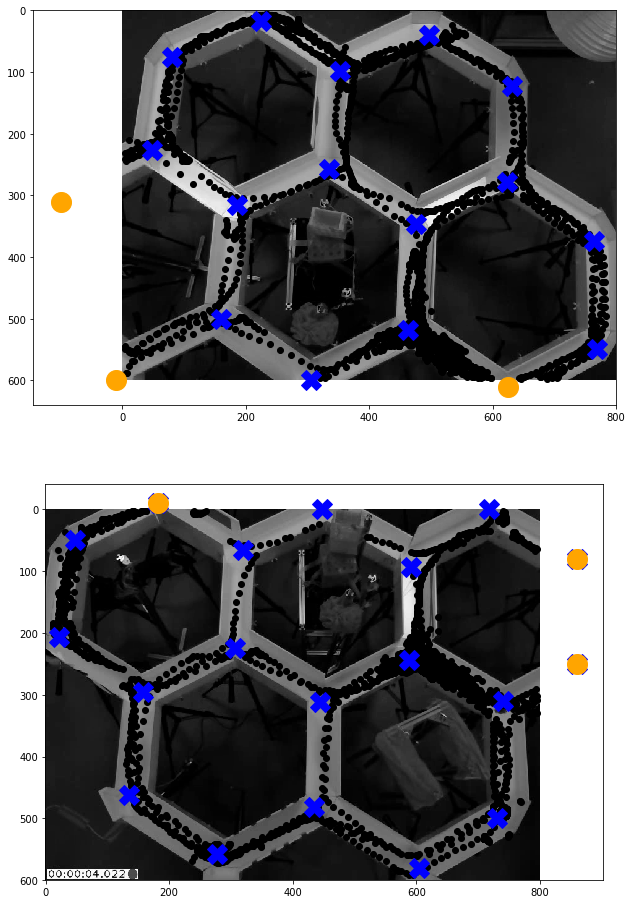

In [4]:
#Display mouse route and node positions
gray_0 = plt.imread(r"C:\Users\Gebruiker\Documents\OfflineHextrack\lib\resources\gray_0.png")
gray_1 = plt.imread(r"C:\Users\Gebruiker\Documents\OfflineHextrack\lib\resources\gray_1.png")
fig, ax = plt.subplots(2, 1, figsize=(16, 16))

ax[0].imshow(gray_0, cmap='gray')
ax[0].plot(dat_0[:,0], dat_0[:,1], 'o', color = 'k')
ax[0].plot(nodes_top[:15,0], nodes_top[:15,1], 'X', markersize = 20, color = 'blue')
ax[0].plot(ghost_nodes_top[:,0], ghost_nodes_top[:,1], 'o', markersize = 20, color = 'orange')
ax[1].imshow(gray_1, cmap='gray')
ax[1].plot(dat_1[:,0], dat_1[:,1], 'o', color = 'k')
ax[1].plot(nodes_bot[:,0], nodes_bot[:,1], 'X',markersize = 20, color = 'blue')
ax[1].plot(ghost_nodes_bot[:,0], ghost_nodes_bot[:,1], 'o', markersize = 20, color = 'orange')

In [4]:
#Euclidian distance
def distance(x1, y1, x2, y2):
    r = np.sqrt((x1-x2)**2+(y1-y2)**2)
    return r

In [5]:
#Obtaining the linearized position
def lin_pos(x1, y1, x2, y2, x3, y3, z):
    x = None
    y = None
    if x1 is not None and x2 is not None and y1 is not None and y2 is not None:
        if x1 == x2:
            x = x1
            y = y3
        else:
            slope = (y2-y1)/(x2-x1)
            x = (y3+(1/slope)*x3-y1+slope*x1)/(slope+(1/slope))
            y = slope*(x-x1)+y1
        x, y = int(x), int(y)
    return x, y, z

In [6]:
#Find x and y positions of the two closest nodes for all mouse positions
X_top, Y_top, Z_top = [], [], []
X_bot, Y_bot, Z_bot = [], [], []

for [x,y,z,_] in dat_0:
    dist = distance(x,y,nodes_top[:,0],nodes_top[:,1])
    dist1, node1 = np.min(dist), nodes_top[np.argmin(dist),2]
    x_node_1, y_node_1 = nodes_top[np.argmin(dist),0], nodes_top[np.argmin(dist),1]
    if np.isnan(dist1):
        node1 = None
        x_node_1, y_node_1 = None, None
    dist[np.argmin(dist)] = 1e12
    dist2, node2 = np.min(dist), nodes_top[np.argmin(dist),2]
    x_node_2, y_node_2 = nodes_top[np.argmin(dist),0], nodes_top[np.argmin(dist),1]
    if np.isnan(dist2):
        node2 = None
        x_node_2, y_node_2 = None, None
        
    # Create an array of linearized positions based on the nodes for all mouse positions including frame number
    x_,y_,z_ = lin_pos(x_node_1, y_node_1, x_node_2, y_node_2, x, y, z)
    X_top.append(x_), Y_top.append(y_), Z_top.append(z_)
    
for [x,y,z,_] in dat_1:
    dist = distance(x,y,nodes_bot[:,0],nodes_bot[:,1])
    dist1, node1 = np.min(dist), nodes_bot[np.argmin(dist),2]
    x_node_1, y_node_1 = nodes_bot[np.argmin(dist),0], nodes_bot[np.argmin(dist),1]
    if np.isnan(dist1):
        node1 = None
        x_node_1, y_node_1 = None, None
    dist[np.argmin(dist)] = 1e12
    dist2, node2 = np.min(dist), nodes_bot[np.argmin(dist),2]
    x_node_2, y_node_2 = nodes_bot[np.argmin(dist),0], nodes_bot[np.argmin(dist),1]
    if np.isnan(dist2):
        node2 = None
        x_node_2, y_node_2 = None, None
        
    # Create an array of linearized positions based on the nodes for all mouse positions including frame number
    x_,y_,z_ = lin_pos(x_node_1, y_node_1, x_node_2, y_node_2, x, y, z)
    X_bot.append(x_), Y_bot.append(y_), Z_bot.append(z_)

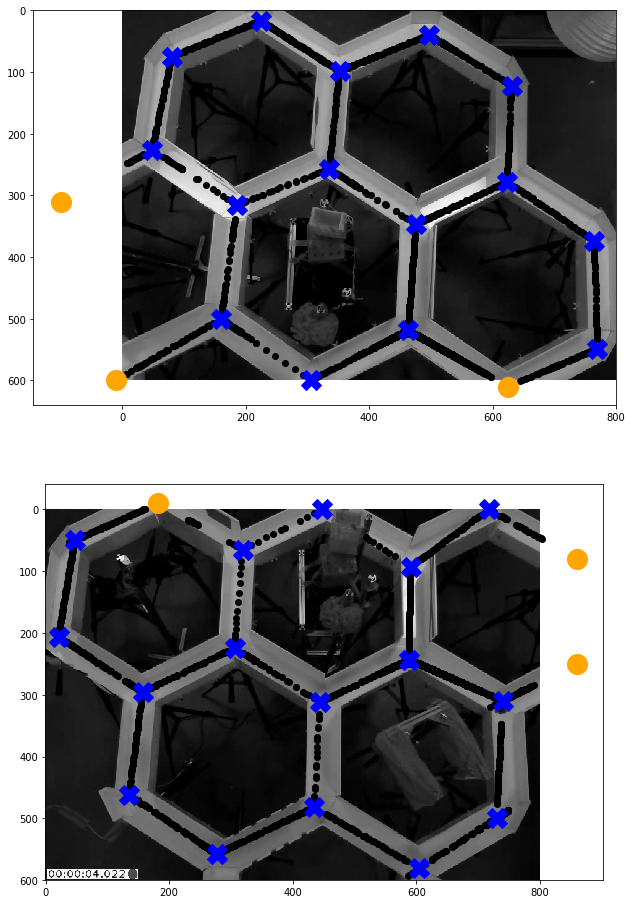

In [8]:
gray_0 = plt.imread(r"C:\Users\Gebruiker\Documents\OfflineHextrack\lib\resources\gray_0.png")
gray_1 = plt.imread(r"C:\Users\Gebruiker\Documents\OfflineHextrack\lib\resources\gray_1.png")
fig, ax = plt.subplots(2, 1, figsize=(16, 16))

ax[0].imshow(gray_0, cmap='gray')
ax[0].plot(X_top, Y_top, 'o', color = 'k')
ax[0].plot(nodes_top[:15,0], nodes_top[:15,1], 'X', markersize = 20,color = 'blue')
ax[0].plot(ghost_nodes_top[:,0], ghost_nodes_top[:,1], 'o', markersize = 20, color = 'orange')
ax[1].imshow(gray_1, cmap='gray')
ax[1].plot(X_bot, Y_bot, 'o', color = 'k')
ax[1].plot(nodes_bot[:16,0], nodes_bot[:16,1], 'X', markersize = 20,color = 'blue')
ax[1].plot(ghost_nodes_bot[:,0], ghost_nodes_bot[:,1], 'o', markersize = 20, color = 'orange')

In [7]:
pos_log_file_lin_0 = open('pos_log_file_lin_0.csv', 'w')
pos_log_file_lin_1 = open('pos_log_file_lin_1.csv', 'w')

for [x,y,z,l] in dat_0:
    dist = distance(x,y,nodes_top[:,0],nodes_top[:,1])
    dist1, node1 = np.min(dist), nodes_top[np.argmin(dist),2]
    x_node_1, y_node_1 = nodes_top[np.argmin(dist),0], nodes_top[np.argmin(dist),1]
    if np.isnan(dist1):
        node1 = None
        x_node_1, y_node_1 = None, None
    dist[np.argmin(dist)] = 1e12
    dist2, node2 = np.min(dist), nodes_top[np.argmin(dist),2]
    x_node_2, y_node_2 = nodes_top[np.argmin(dist),0], nodes_top[np.argmin(dist),1]
    if np.isnan(dist2):
        node2 = None
        x_node_2, y_node_2 = None, None
    rel_pos = np.nan
    if not np.isnan(dist1):
        nodes_dist = distance(x_node_1, y_node_1, x_node_2, y_node_2)
        x_lin, y_lin, z_lin = lin_pos(x_node_1, y_node_1, x_node_2, y_node_2, x, y ,z)
        lin_dist_1 = distance(x_lin, y_lin, x_node_1, y_node_1)
        lin_dist_2 = distance(x_lin, y_lin, x_node_2, y_node_2)
        if lin_dist_1+lin_dist_2 > nodes_dist+0.2:
            rel_pos = -lin_dist_1/nodes_dist
        else:
            rel_pos = lin_dist_1/nodes_dist
    pos_log_file_lin_0.write('{}, {}, {}, {}, {}, {}, {}\n'.format(x, y, z, l, rel_pos, node1, node2))
    
for [x,y,z,l] in dat_1:
    dist = distance(x,y,nodes_bot[:,0],nodes_bot[:,1])
    dist1, node1 = np.min(dist), nodes_bot[np.argmin(dist),2]
    x_node_1, y_node_1 = nodes_bot[np.argmin(dist),0], nodes_bot[np.argmin(dist),1]
    if np.isnan(dist1):
        node1 = None
        x_node_1, y_node_1 = None, None
    dist[np.argmin(dist)] = 1e12
    dist2, node2 = np.min(dist), nodes_bot[np.argmin(dist),2]
    x_node_2, y_node_2 = nodes_bot[np.argmin(dist),0], nodes_bot[np.argmin(dist),1]
    if np.isnan(dist2):
        node2 = None
        x_node_2, y_node_2 = None, None
    rel_pos = np.nan
    if not np.isnan(dist1):
        nodes_dist = distance(x_node_1, y_node_1, x_node_2, y_node_2)
        x_lin, y_lin, z_lin = lin_pos(x_node_1, y_node_1, x_node_2, y_node_2, x, y ,z)
        lin_dist_1 = distance(x_lin, y_lin, x_node_1, y_node_1)
        lin_dist_2 = distance(x_lin, y_lin, x_node_2, y_node_2)
        if lin_dist_1+lin_dist_2 > nodes_dist+0.2:
            rel_pos = -lin_dist_1/nodes_dist
        else:
            rel_pos = lin_dist_1/nodes_dist
    pos_log_file_lin_1.write('{}, {}, {}, {}, {}, {}, {}\n'.format(x, y, z, l, rel_pos, node1, node2))

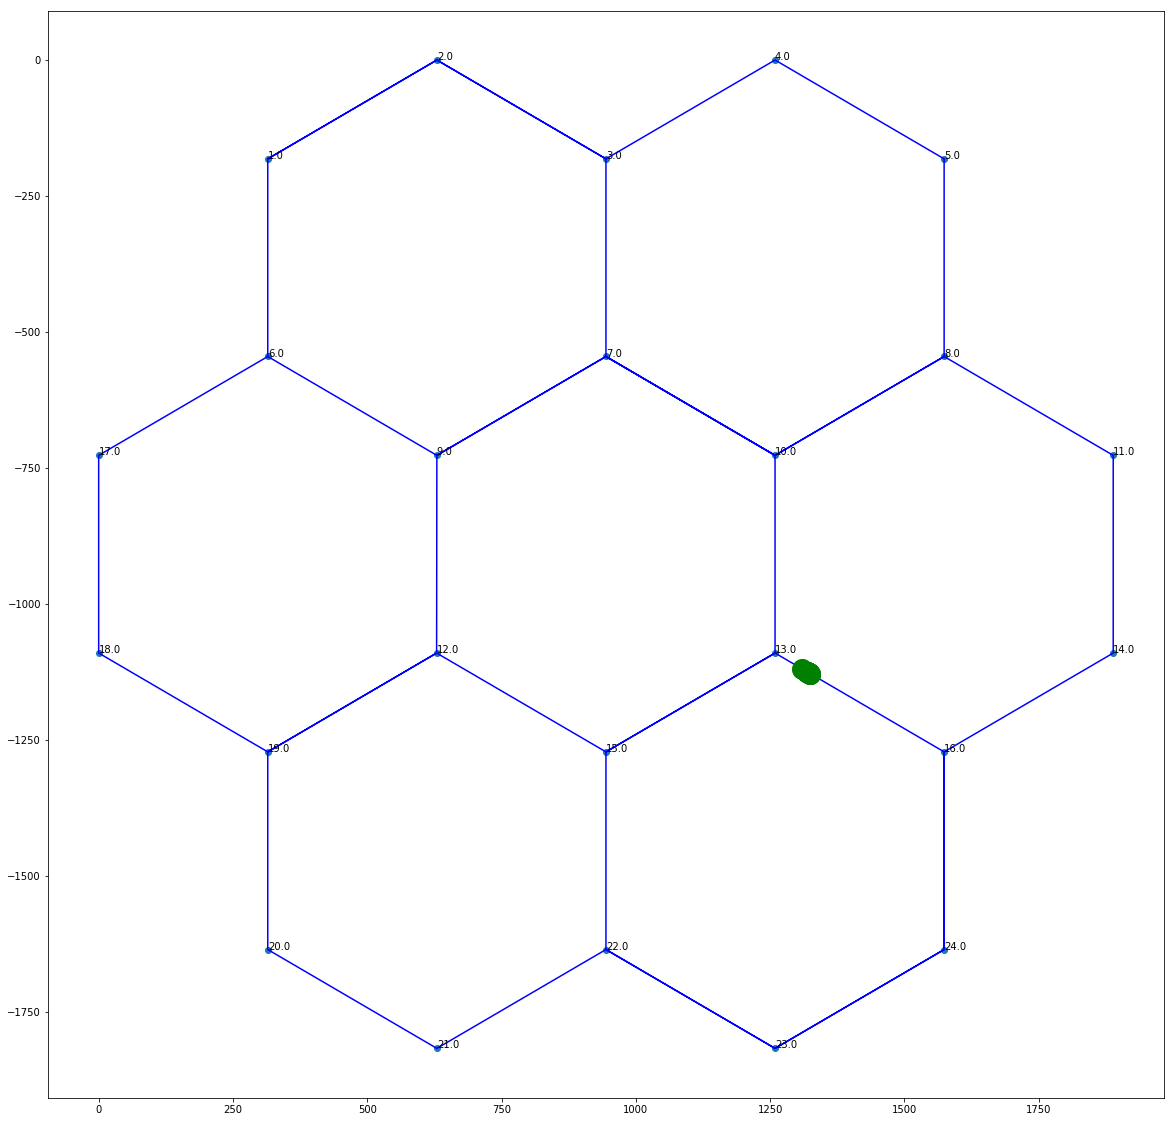

In [10]:
ref_nodes = np.genfromtxt(r'C:\users\gebruiker\documents\offlinehextrack\lib\resources\ref_nodes.csv', delimiter=',', skip_header=True)

fig, ax = plt.subplots(figsize = (20,20))
ax.scatter(ref_nodes[:,0], ref_nodes[:,1])
lines = [(ref_nodes[0,0],ref_nodes[1,0], ref_nodes[2,0],ref_nodes[3,0],ref_nodes[4,0],ref_nodes[7,0],ref_nodes[9,0],ref_nodes[6,0],ref_nodes[8,0],ref_nodes[5,0],ref_nodes[16,0],ref_nodes[17,0],ref_nodes[18,0],ref_nodes[11,0],ref_nodes[14,0],ref_nodes[12,0],ref_nodes[15,0],ref_nodes[23,0],ref_nodes[22,0],ref_nodes[21,0],ref_nodes[20,0],ref_nodes[19,0],ref_nodes[18,0],ref_nodes[11,0],ref_nodes[8,0],ref_nodes[6,0],ref_nodes[9,0],ref_nodes[12,0],ref_nodes[14,0],ref_nodes[21,0],ref_nodes[22,0],ref_nodes[23,0],ref_nodes[15,0],ref_nodes[13,0],ref_nodes[10,0],ref_nodes[7,0],ref_nodes[9,0],ref_nodes[6,0],ref_nodes[2,0],ref_nodes[1,0],ref_nodes[0,0],ref_nodes[5,0]), (ref_nodes[0,1], ref_nodes[1,1], ref_nodes[2,1],ref_nodes[3,1],ref_nodes[4,1],ref_nodes[7,1],ref_nodes[9,1],ref_nodes[6,1],ref_nodes[8,1],ref_nodes[5,1],ref_nodes[16,1],ref_nodes[17,1],ref_nodes[18,1],ref_nodes[11,1],ref_nodes[14,1],ref_nodes[12,1],ref_nodes[15,1],ref_nodes[23,1],ref_nodes[22,1],ref_nodes[21,1],ref_nodes[20,1],ref_nodes[19,1],ref_nodes[18,1],ref_nodes[11,1],ref_nodes[8,1],ref_nodes[6,1],ref_nodes[9,1],ref_nodes[12,1],ref_nodes[14,1],ref_nodes[21,1],ref_nodes[22,1],ref_nodes[23,1],ref_nodes[15,1],ref_nodes[13,1],ref_nodes[10,1],ref_nodes[7,1],ref_nodes[9,1],ref_nodes[6,1],ref_nodes[2,1],ref_nodes[1,1],ref_nodes[0,1],ref_nodes[5,1])]
plt.plot(*lines, 'blue')

for i, txt in enumerate(ref_nodes[:,2]):
    ax.annotate(txt, (ref_nodes[i,0], ref_nodes[i,1]))
    
dat_0 = np.genfromtxt('pos_log_file_lin_0.csv', delimiter =',' , skip_header =True)
dat_1 = np.genfromtxt('pos_log_file_lin_1.csv', delimiter =',' , skip_header =True)

for k in range(len(dat_0)):

    if not np.isnan(dat_0[k,5]):
        x1 = ref_nodes[int(dat_0[k,5])-1,0]
        y1 = ref_nodes[int(dat_0[k,5])-1,1]
        x2 = ref_nodes[int(dat_0[k,6])-1,0]
        y2 = ref_nodes[int(dat_0[k,6])-1,1]
        d = dat_0[k,4]*distance(x1, y1, x2, y2)
        
        if x1 != x2:
            slope = (y2-y1)/(x2-x1)

            a = 1 + slope**2
            b = (-2*x1-2*slope**2*x1)
            c = (x1**2+slope**2*x1**2-d**2)
            if x1 >= x2:
                x4 = (-b-np.sqrt(b**2-4*a*c))/(2*a)
            elif x1 <= x2:
                x4 = (-b+np.sqrt(b**2-4*a*c))/(2*a)
            y4 = slope*(x4-x1)+y1
            
        elif x1 == x2:
            x4 = x1
            if y1 > y2:
                y4 = y1-d
            elif y1 < y2:
                y4 = y1+d
        
        plt.plot(x4,y4, 'o', color = 'green', markersize = '20')

for k in range(len(dat_1)):

    if not np.isnan(dat_1[k,5]):
        x1 = ref_nodes[int(dat_1[k,5])-1,0]
        y1 = ref_nodes[int(dat_1[k,5])-1,1]
        x2 = ref_nodes[int(dat_1[k,6])-1,0]
        y2 = ref_nodes[int(dat_1[k,6])-1,1]
        d = dat_1[k,4]*distance(x1, y1, x2, y2)
        
        if x1 != x2:
            slope = (y2-y1)/(x2-x1)

            a = 1 + slope**2
            b = (-2*x1-2*slope**2*x1)
            c = (x1**2+slope**2*x1**2-d**2)
            if x1 >= x2:
                x4 = (-b-np.sqrt(b**2-4*a*c))/(2*a)
            elif x1 <= x2:
                x4 = (-b+np.sqrt(b**2-4*a*c))/(2*a)
            y4 = slope*(x4-x1)+y1
        
        elif x1 == x2:
            x4 = x1
            if y1 > y2:
                y4 = y1-d
            elif y1 < y2:
                y4 = y1+d
        
        plt.plot(x4,y4, 'o', color = 'red', markersize = '20')
